In [1]:
import matplotlib.pyplot as plt
import numpy as np
# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

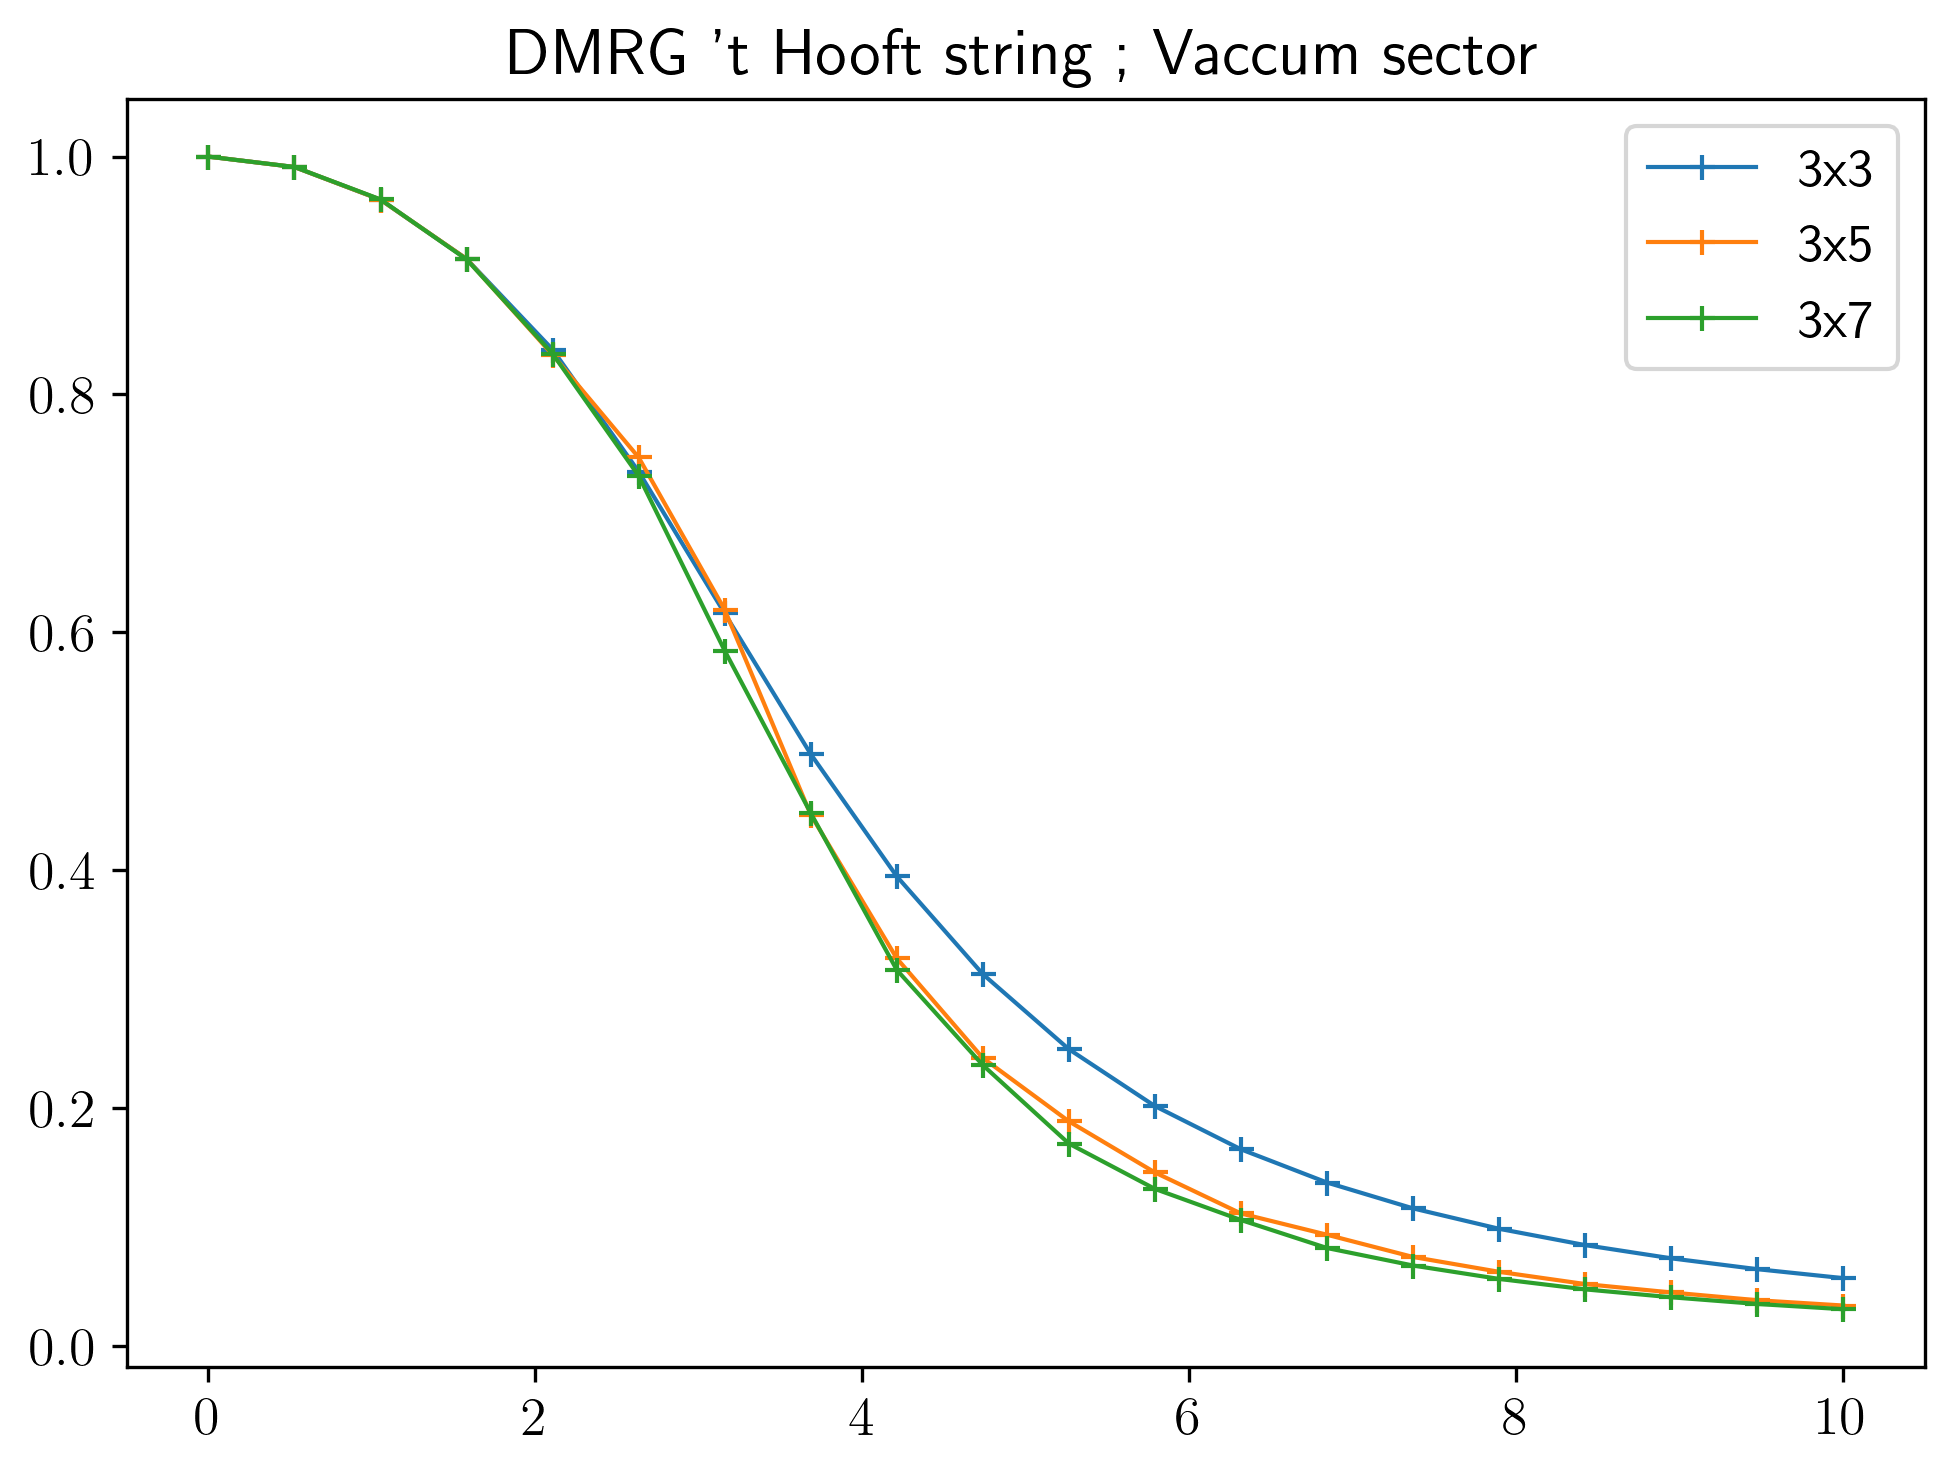

In [2]:
Ls = [3,5,7]
chis = [8,16,32]
ss = [1,2,3]
plt.title("DMRG 't Hooft string ; Vaccum sector")
hs = np.linspace(0,10,20)
for L, chi, s in zip(Ls, chis, ss):
    string = np.load(f"/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/thooft/thooft_string_{s}-1_horizontal_Z2_dual_direct_lattice_3x{L}_vacuum_sector_None-None_h_0.0-10.0_delta_20_chi_{chi}.npy")
    plt.plot(hs, string, '+-', linewidth=1, label=f"3x{L}")

plt.legend()
plt.show()